In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Curso Minedu

Curso: Gestiona entornos virtuales para apoyar el aceeso a los contenidos, actividades y evaluaciones diversificadas 2ed

In [2]:
# Cargamos los datos
df = pd.read_csv("../data/df_encuesta_final.csv",sep=";") 
df

C:\Users\JuniorOM\AppData\Local\Temp\ipykernel_16876\2780594732.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/df_encuesta_final.csv",sep=";")


,Curso,Region,Ugel,Edad,Sexo,Cargo,Cargo_otros,Nivel,Nivel_otros,Grado,...,pc_00,pc_01,pc_02,pc_03,pc_04,pc_05,pc_06,pc_07,pc_08,pc_09
0,Bienestar socioemocional para el retorno a la ...,AMAZONAS,Utcubamba,51 a 60,Mujer,Director,NaN,Primaria,NaN,Primaria,...,NaN,0,0,0,0,0,0,0,0,0
1,Bienestar socioemocional para el retorno a la ...,AMAZONAS,UTCUBAMBA,41 a 50,Hombre,Director,PRIMARIA,Primaria,NaN,Primaria,...,NaN,0,0,0,0,0,0,0,0,0
2,Bienestar socioemocional para el retorno a la ...,AMAZONAS,LUYA,51 a 60,Mujer,Docente,NaN,Primaria,NaN,Primaria,...,NaN,0,0,0,0,0,0,0,0,0
3,Bienestar socioemocional para el retorno a la ...,AMAZONAS,303,31 a 40,Hombre,Docente,NaN,Primaria,NaN,Primaria,...,NaN,1,0,1,0,1,0,0,0,0
4,Bienestar socioemocional para el retorno a la ...,AMAZONAS,Bongará,51 a 60,Hombre,Docente,NaN,Secundaria,NaN,Secundaria,...,NaN,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33258,Evaluación diagnóstica para el buen retorno,LAMBAYEQUE,CHICLAYO,41 a 50,Mujer,Docente,NaN,Secundaria,NaN,Secundaria 22,...,NaN,0,0,0,0,0,0,0,1,0
33259,Evaluación diagnóstica para el buen retorno,LAMBAYEQUE,lambayeque,20 a 30,Mujer,Docente,NaN,Secundaria,NaN,Secundaria 22,...,NaN,0,0,0,0,0,0,0,0,1
33260,Evaluación diagnóstica para el buen retorno,LAMBAYEQUE,lambayeuqe,41 a 50,Hombre,Docente,NaN,Secundaria,NaN,Secundaria 22,...,NaN,0,0,0,1,0,0,0,0,0
33261,Evaluación diagnóstica para el buen retorno,LAMBAYEQUE,CHICLAYO,41 a 50,Hombre,Docente,NaN,Secundaria,MATEMATICA,Secundaria 22,...,NaN,0,0,0,0,1,0,0,0,0


### Data Cleaning

In [3]:
#Funcion de nulos y count
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space',4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print(adjoin(space, *reprs))
    print()
    return
# side_by_side(df.isnull().sum(),df.value_counts())

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33263 entries, 0 to 33262
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Curso                  33263 non-null  object 
 1   Region                 33263 non-null  object 
 2   Ugel                   32883 non-null  object 
 3   Edad                   33138 non-null  object 
 4   Sexo                   33093 non-null  object 
 5   Cargo                  33214 non-null  object 
 6   Cargo_otros            7307 non-null   object 
 7   Nivel                  33207 non-null  object 
 8   Nivel_otros            4623 non-null   object 
 9   Grado                  29016 non-null  object 
 10  Inicial                12002 non-null  object 
 11  Primaria               10753 non-null  object 
 12  Secundaria             13449 non-null  object 
 13  Experiencia_anio       32555 non-null  object 
 14  Situacion_laboral      33154 non-null  object 
 15  Si

In [5]:
side_by_side(df.isnull().sum(),df.value_counts())

# Salida del total filas si tienen valores 
#df.info()

Curso                        0    Series([], dtype: int64)
Region                       0                            
Ugel                       380                            
Edad                       125                            
Sexo                       170                            
Cargo                       49                            
Cargo_otros              25956                            
Nivel                       56                            
Nivel_otros              28640                            
Grado                     4247                            
Inicial                  21261                            
Primaria                 22510                            
Secundaria               19814                            
Experiencia_anio           708                            
Situacion_laboral          109                            
Situacion_laboral_Esp    17097                            
p1                           0                          

In [6]:
# Elimar columnas 
df1 = df.drop(['Curso'
                ,'Ugel'
                ,'Cargo_otros'
                ,'Nivel_otros'
                ,'Inicial'
                ,'Primaria'
                ,'Secundaria'
                ,'Experiencia_anio'
                ,'Situacion_laboral_Esp'
                ,'p11'
                ,'p12'
                ,'p17'
                ,'p18'
                ,'p17_Esp'
                ,'p18_Esp'
                ,'p19_Esp'
                ,'p19_Esp_1'
                ,'p19_Esp_2'
                ,'p21_Esp'
                ,'pc_00'],axis=1)

In [7]:
df1.columns

Index(['Region', 'Edad', 'Sexo', 'Cargo', 'Nivel', 'Grado',
       'Situacion_laboral', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8',
       'p9', 'p10', 'p13', 'p14', 'p15', 'p16', 'p19', 'p20', 'p21', 'pc_01',
       'pc_02', 'pc_03', 'pc_04', 'pc_05', 'pc_06', 'pc_07', 'pc_08', 'pc_09'],
      dtype='object')

## Reclasificar las variables de importancia

In [8]:

# p1 al p10
reclass_01 = {"Satisfecho":1,"Muy satisfecho":1,"Poco satisfecho": 0,"Nada satisfecho":0}
df1['p1'] = df1['p1'].map(reclass_01)

reclass_02 = {"Nada satisfecho":1,"Poco satisfecho":2,"Satisfecho":3,"Muy satisfecho":4}
df1['p2'] = df1['p2'].map(reclass_02)
df1['p3'] = df1['p3'].map(reclass_02)
df1['p4'] = df1['p4'].map(reclass_02)
df1['p5'] = df1['p5'].map(reclass_02)
df1['p6'] = df1['p6'].map(reclass_02)
df1['p7'] = df1['p7'].map(reclass_02)
df1['p8'] = df1['p8'].map(reclass_02)
df1['p9'] = df1['p9'].map(reclass_02)
df1['p10'] = df1['p10'].map(reclass_02)
df1['p13'] = df1['p13'].map(reclass_02)
df1['p14'] = df1['p14'].map(reclass_02)

reclass_03 = {'Nada útil':1,'Poco útil':2,"Útil":3,"Muy útil":4}
df1['p15'] = df1['p15'].map(reclass_03)
df1['p16'] = df1['p16'].map(reclass_03)

reclass_04 = {'Sí':1,'No':0}
df1['p19'] = df1['p19'].map(reclass_04)


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33263 entries, 0 to 33262
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             33263 non-null  object 
 1   Edad               33138 non-null  object 
 2   Sexo               33093 non-null  object 
 3   Cargo              33214 non-null  object 
 4   Nivel              33207 non-null  object 
 5   Grado              29016 non-null  object 
 6   Situacion_laboral  33154 non-null  object 
 7   p1                 33263 non-null  int64  
 8   p2                 33263 non-null  int64  
 9   p3                 33263 non-null  int64  
 10  p4                 33263 non-null  int64  
 11  p5                 33263 non-null  int64  
 12  p6                 33263 non-null  int64  
 13  p7                 33263 non-null  int64  
 14  p8                 33263 non-null  int64  
 15  p9                 33263 non-null  int64  
 16  p10                174

In [10]:
# Valores NA
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
nulos = pd.concat([total,percent],axis=1, keys=['Total','Percent'])
nulos.head(10)

,Total,Percent
p10,15823,0.475694
Grado,4247,0.127679
p16,4061,0.122088
p15,4061,0.122088
p19,1755,0.052761
Sexo,170,0.005111
Edad,125,0.003758
Situacion_laboral,109,0.003277
Nivel,56,0.001684
Cargo,49,0.001473


In [11]:
df1.isnull().values.any()

True

In [12]:
df2 = df1.dropna()

In [13]:
df2.isnull().values.any()

False

In [14]:
print(df2.shape)

(17440, 33)


### Check Balance

Conteo de Classe p1 : Satisfaccion del Curso
1    16168
0     1272
Name: p1, dtype: int64
(17440, 33)


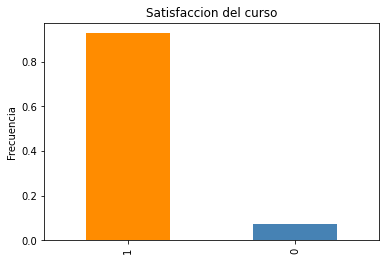

In [15]:
print("Conteo de Classe p1 : Satisfaccion del Curso")
print(df2['p1'].value_counts())
print(df2.shape)
df2['p1'].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'])
plt.ylabel('Frecuencia')
plt.title('Satisfaccion del curso')
plt.show()

In [17]:
def plot_corr_v2(df):
    fig=plt.figure(figsize=(18,10))
    sns.heatmap(df.corr(),annot=True)
    plt.tight_layout()

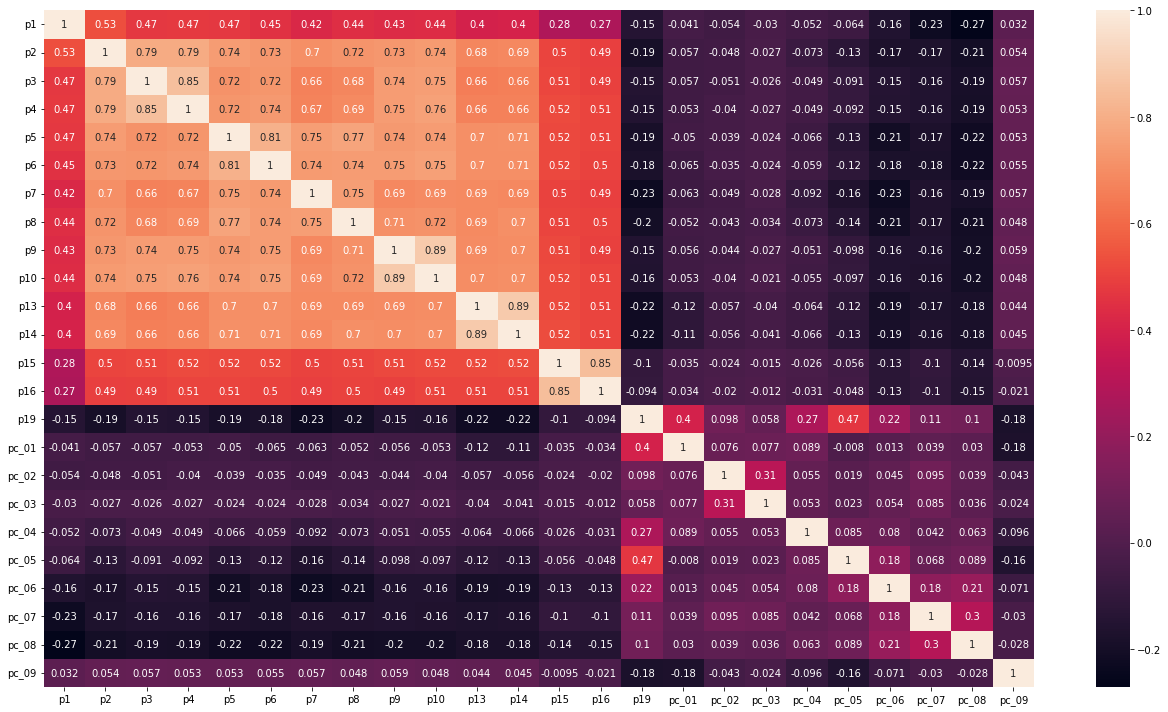

In [18]:
plot_corr_v2(df2)

A partir de este grafico utilizaremos las caracteristicas con correlacion mayor a 0.2 para la variable satisfaccion 

<AxesSubplot:>

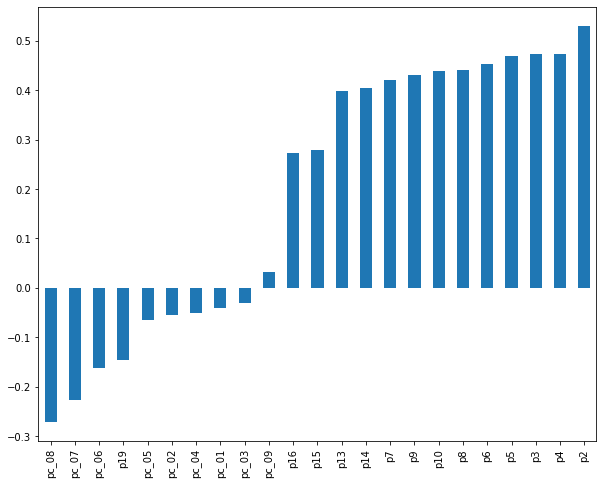

In [19]:
df2.corr()['p1'].sort_values().drop('p1').plot(kind='bar',figsize=(10,8))

3    12105
4     3850
2     1407
1       78
Name: p2, dtype: int64


<AxesSubplot:ylabel='Frequency'>

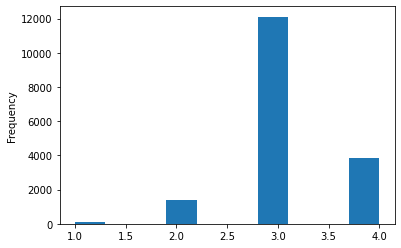

In [20]:
print(df2['p2'].value_counts())
df2['p2'].plot(kind='hist')


<AxesSubplot:xlabel='p1', ylabel='p2'>

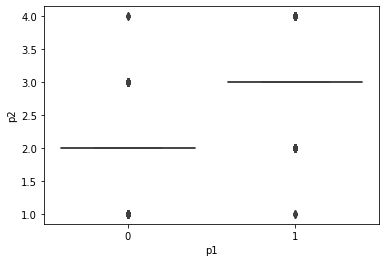

In [21]:
sns.boxplot(x='p1',y='p2',data=df2)

Cuanto mas este la persona satisfecha con el cumplimiento de sus expectativas, mayores seran las posibilidades de que este satisfecha con el curso en general. Lo mismo ocurriria con los demas parametros

In [22]:
# Ahora veamos la correlacion de la variable p2 : Cumplimiento de las expetactivas 
# con las otras variables

<AxesSubplot:>

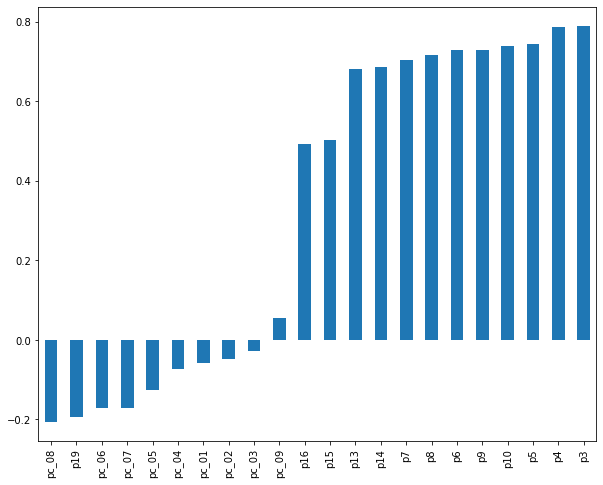

In [23]:
df2.corr()['p2'].sort_values().drop(['p2','p1']).plot(kind='bar',figsize=(10,8))

<AxesSubplot:xlabel='p3', ylabel='p2'>

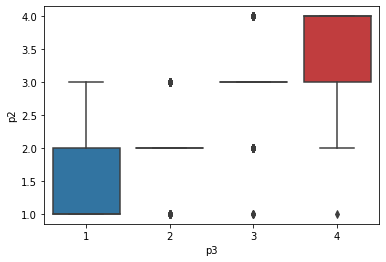

In [24]:
sns.boxplot(x='p3',y='p2',data=df2)

Es probable que las personas que obtienen una mayor satisfacciión en la utilidad del curso para la aplicacion en su praqctica pédagogica y cumplimiento de sus expectativas , esten satisfechas con el curso

## Eliminando Columnas

In [29]:
df2.columns

Index(['Region', 'Edad', 'Sexo', 'Cargo', 'Nivel', 'Grado',
       'Situacion_laboral', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8',
       'p9', 'p10', 'p13', 'p14', 'p15', 'p16', 'p19', 'p20', 'p21', 'pc_01',
       'pc_02', 'pc_03', 'pc_04', 'pc_05', 'pc_06', 'pc_07', 'pc_08', 'pc_09'],
      dtype='object')

In [31]:
# Columnas P1
df3 = df2.drop(['Region', 'Edad', 'Sexo', 'Cargo', 'Nivel', 'Grado','Situacion_laboral','p20', 'p21', 'pc_01','pc_02', 'pc_03', 'pc_04', 'pc_05', 'pc_06', 'pc_07', 'pc_08', 'pc_09'],axis=1)
# df3['p15']=df3['p15'].astype('int64')
# df3['p16']=df3['p16'].astype('int64')
# df3['p19']=df3['p19'].astype('int64')

In [35]:
df3['p10']=df3['p10'].astype('int64')
df3['p15']=df3['p15'].astype('int64')
df3['p16']=df3['p16'].astype('int64')
df3['p19']=df3['p19'].astype('int64')

In [36]:
df3.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p13,p14,p15,p16,p19
0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,0
1,1,4,4,4,3,4,4,4,4,4,4,4,4,4,0
2,1,3,3,3,3,3,3,3,3,3,3,3,3,3,0
3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,1
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,1


1    16168
0     1272
Name: p1, dtype: int64


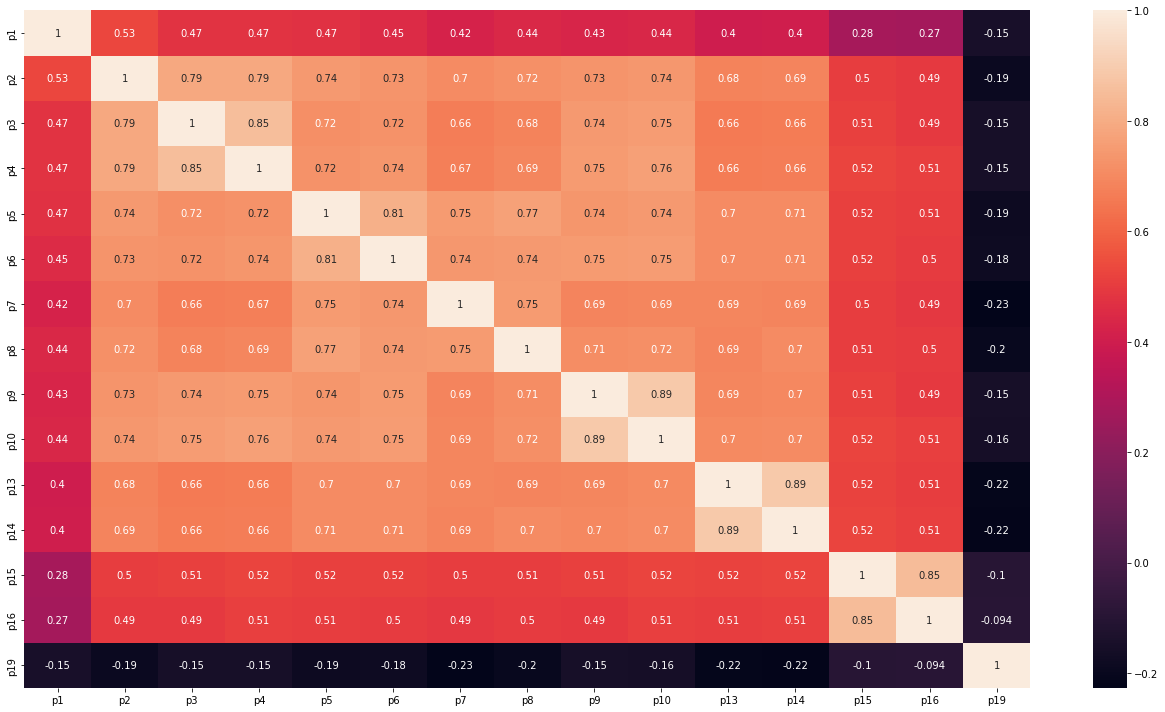

In [39]:
print(df3['p1'].value_counts())
plot_corr_v2(df3)

## Seleccion del Modelo

Regresion logistica ( Optimizar el mejor C )

In [40]:
x= df3.drop('p1',axis=1)
y = df3['p1']


In [44]:
# Separar los datos de entrenamiendo y prueba en una proporcion de 70 a 30 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape)


(12208, 14) (5232, 14)


In [45]:
# Configuracion del MOdelo 
logit_model = LogisticRegression(max_iter=1000)

In [46]:
logit_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [48]:
y_pred = logit_model.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [51]:
# Diagnostico del modelo 
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

[[ 309   96]
 [  49 4778]]
Accuracy:  0.9722859327217125


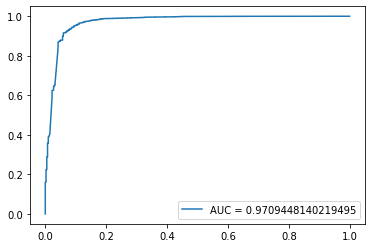

In [54]:
# Plot ROC Curve 
y_pred_proba = logit_model.predict_proba(x_test)[::,1]
fpr, tpr, _= metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label= "AUC = " + str(auc))
plt.legend(loc=4)
plt.show()

In [56]:
print(logit_model.intercept_)
print(logit_model.coef_)

[-17.59894105]
[[ 2.66907283  1.10116287  0.92329416  1.06426348  0.53387628  0.17326038
   0.31163953  0.23486901  0.27247312  0.06227478  0.11421709  0.20031309
  -0.23897853 -0.39792322]]
